KNN
------------------------------------


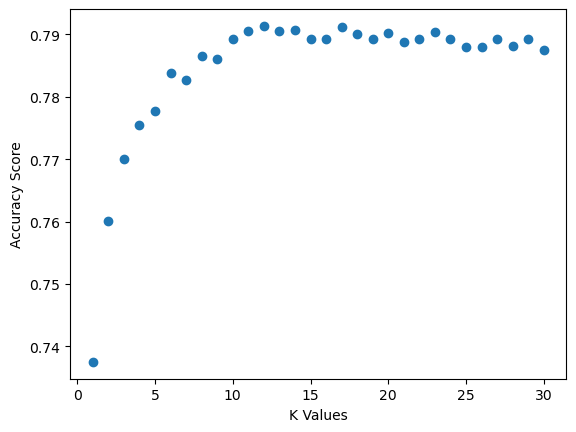

Accuracy: 0.7933293627159024
Precision: 0.7874157461190536
Recall: 0.7933293627159024

Confusion Matrix:
[[915  85   7]
 [195 404   4]
 [ 44  12  13]]


SVM
------------------------------------


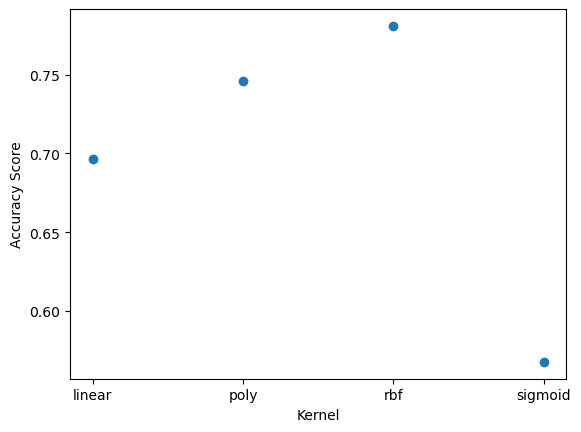

Accuracy: 0.7933293627159024
Precision: 0.7902895283719724
Recall: 0.7933293627159024

Confusion Matrix:
[[918  88   1]
 [194 406   3]
 [ 52   9   8]]


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt

path = "dataset/normalized/"

df = pd.read_csv(path + "kart.csv")

# Split the data into features (X) and target (y)
X = df.drop('action', axis=1)
y = df['action']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("KNN")
print("------------------------------------")

#cross validation para encontrar el mejor valor de k
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
    
scatter = plt.scatter(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

#knn with k=12, que es el mejor
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

#metricas
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\n\nSVM")
print("------------------------------------")

# Cross-validation para encontrar el mejor kernel
kernel_values = ["linear", "poly", "rbf", "sigmoid"]
scores = []

for kernel in kernel_values:
    clf = SVC(kernel=kernel)
    score = cross_val_score(clf, X, y, cv=5)
    scores.append(np.mean(score))
    
scatter = plt.scatter(x=kernel_values, y=scores, marker='o')
plt.xlabel("Kernel")
plt.ylabel("Accuracy Score")
plt.show()

# Entrenamiento del clasificador con el mejor kernel
best_kernel = kernel_values[np.argmax(scores)]
clf = SVC(kernel=best_kernel)
clf.fit(X_train, y_train)

# Metricas
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:")
print(conf_matrix)